# script to graph opentuner log

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import numpy as np

# graph exec time vs. time in log file (--results-log-details)
def graph_log(log_name):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "exectime"])
    plt.plot(data["wallclock"], data["exectime"], '-+', label='tuned', linewidth=1)
    plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.legend()
    plt.show()

In [2]:
# graph gflops vs. time in log file (--results-log-details)
def graph_log_gflops(log_name):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "gflops"])
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y')
    plt.plot(data["wallclock"], data["gflops"], '-+', label='tuned', linewidth=1)
    plt.xlabel("Tuning Time (s)")
    plt.ylabel("Gflops")
    plt.legend()
    plt.show()

In [3]:
# graph exec time vs. tuning time in log file (--results-log-details)
def graph_tuning(log_name, mesh2d=0.0, mesh3d=0.0, torus2d=0.0, torus3d=0.0, axis="time", last=0):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "exectime"])
    best_times = []
    best_time = data["exectime"][0]
    best_times.append(best_time)
    worst_time = 0.0
    for i in range(1, len(data["exectime"])):
        if data["exectime"][i] < best_time:
            best_time = data["exectime"][i]
        best_times.append(best_time)
    if mesh2d > 0.0:
        plt.axhline(y=mesh2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='red', label='2dmesh')
    if mesh3d > 0.0:
        plt.axhline(y=mesh3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='blue', label='3dmesh')  
    if torus2d > 0.0:
        plt.axhline(y=torus2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='green', label='2dtorus')   
    if torus3d > 0.0:
        plt.axhline(y=torus3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='brown', label='3dtorus')     
    max_time = max(data["exectime"][0], mesh2d, mesh3d, torus2d, torus3d)
    min_time = min(best_time, mesh2d, mesh3d, torus2d, torus3d)
    if min_time == 0:
        min_time = best_time
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    if last > 0:
        plt.xlim((0, last))
    if axis == "id":
        plt.plot(range(1, len(data)+1), best_times, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Number of Tests")
    else:
        plt.plot(data["wallclock"], best_times, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.ylim(top=max_time+(max_time-min_time)*0.4, bottom=min_time-(max_time-min_time)*0.2)
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    plt.tick_params(which='major', length=4)
    plt.grid(False)
    plt.legend(frameon=False, fontsize=12, loc='upper right', ncol=3)
    # plt.savefig(log_name+'.eps', bbox_inches='tight', transparent=True)
    plt.show()

In [4]:
# gflops vs. tuning time in log file (--results-log-details)
def graph_tuning_1(log_name, mesh2d=float("inf"), mesh3d=float("inf"), torus2d=float("inf"), torus3d=float("inf"), axis="time", last=0):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "gflops"])
    best_gflopss = []
    best_gflops = data["gflops"][0]
    best_gflopss.append(best_gflops)
    worst_gflops = 0.0
    for i in range(1, len(data["gflops"])):
        if data["gflops"][i] > best_gflops:
            best_gflops = data["gflops"][i]
        best_gflopss.append(best_gflops)
    if mesh2d < float("inf"):
        plt.axhline(y=mesh2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='red', label='2dmesh')
    if mesh3d < float("inf"):
        plt.axhline(y=mesh3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='blue', label='3dmesh')  
    if torus2d < float("inf"):
        plt.axhline(y=torus2d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='green', label='2dtorus')   
    if torus3d < float("inf"):
        plt.axhline(y=torus3d, xmin=0, xmax=1, linestyle='-', linewidth=1, color='brown', label='3dtorus')     
    min_gflops = min(data["gflops"][0], mesh2d, mesh3d, torus2d, torus3d)
    max_gflops = max(best_gflops, mesh2d, mesh3d, torus2d, torus3d)
    if max_gflops == float("inf"):
        max_gflops = best_gflops
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y')
    if last > 0:
        plt.xlim((0, last))
    if axis == "id":
        plt.plot(range(1, len(data)+1), best_gflopss, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Number of Tests")
    else:
        plt.plot(data["wallclock"], best_gflopss, '^-', label='tuned', color='black', linewidth=1, markersize=8)
        plt.xlabel("Tuning Time (s)")
    plt.ylabel("Gflops")
    plt.ylim(top=max_gflops+(max_gflops-min_gflops)*0.4, bottom=min_gflops-(max_gflops-min_gflops)*0.2)
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    plt.tick_params(which='major', length=4)
    plt.grid(False)
    plt.legend(frameon=False, fontsize=12, loc='upper right', ncol=3)
    # plt.savefig(log_name+'.eps', bbox_inches='tight', transparent=True)
    plt.show()

In [5]:
from matplotlib.ticker import PercentFormatter
# percentage of tuning tests required to get close to the optimal execution time within the tuning period
def graph_tests(**logs): #dict logs={AAA:"xxx", BBB:"yyy", CCC:"zzz"}
    C1 = []
    C2 = []
    C3 = []
    for appname, logname in logs.items():
        data = pd.read_csv(logname, sep=" ", names=["wallclock", "exectime"])
        tmin = min(data["exectime"])
        ntests = len(data["exectime"])
        R1 = 0.0
        R2 = 0.0
        R3 = 0.0
        for i in range(ntests):
            if R1 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.7:
                R1 = (i+1)/ntests
            if R2 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.8:
                R2 = (i+1)/ntests
            if R3 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.9:
                R3 = (i+1)/ntests
                break
        C1.append(R1)
        C2.append(R2)
        C3.append(R3)
    # plot data in grouped manner of bar type
    x = np.arange(len(logs)) # different from range(), can subtract -
    width = 0.3
    plt.bar(x-width, C1, width, color='cyan')
    plt.bar(x, C2, width, color='orange')
    plt.bar(x+width, C3, width, color='green')
    for a, b in list(zip(x-width, C1)) + list(zip(x, C2)) + list(zip(x+width, C3)):
        plt.text(a, b, '%.0f%%'%(b*100), ha="center", va="bottom", fontsize=8)
    plt.xticks(x, list(logs.keys()))
    plt.xlabel("Applications")
    plt.ylabel("Percentage of Tests")
    plt.legend(["C = 70%", "C = 80%", "C = 90%"])
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
    # plt.savefig('tests.eps', bbox_inches='tight', transparent=True)
    plt.show()

# graph_tests(CG="cg.A.64.log", MG="mg.A.64.log", FT="ft.A.64.log", MM="gemm.64.log", Graph500="graph500.64.log")

In [6]:
# speedup within the tuning period
def graph_speedup(**logs): #dict logs={AAA:"xxx", BBB:"yyy", CCC:"zzz"}
    S = []
    for appname, logname in logs.items():
        data = pd.read_csv(logname, sep=" ", names=["wallclock", "exectime"])
        tmin = min(data["exectime"])
        tini = data["exectime"][0]
        speedup = (tini-tmin)/tini
        S.append(speedup)
    S.append(np.mean(S))
    # plot data in grouped manner of bar type
    x = np.arange(len(logs)+1) # different from range(), can subtract -
    width = 0.8
    plt.bar(x, S, width, color='steelblue')
    for a, b in zip(x, S):
        plt.text(a, b, '%.1f%%'%(b*100), ha="center", va="bottom", fontsize=12)
    appnames = list(logs.keys())
    appnames.append("Avg")
    plt.xticks(x, appnames)
    plt.xlabel("Applications")
    plt.ylabel("Speedup")
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
    plt.ylim(top=0.7)
    # plt.savefig('speedup.eps', bbox_inches='tight', transparent=True)
    plt.show()        

# graph_speedup(CG="cg.A.64.log", MG="mg.A.64.log", FT="ft.A.64.log", MM="gemm.64.log", Graph500="graph500.64.log")

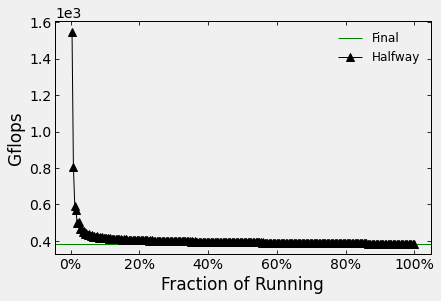

In [7]:
# process hpl output (gflops vs fraction)
def graph_hpl_output(file):
    lines = ''
    with open(file, "r") as f:
        lines = f.readlines()
    fractions = []
    gflopss = []
    hplgflops = 0.0
    for idx, line in enumerate(lines):
        if 'Column=' in line:
            fractions.append(eval(line.split('Fraction=')[1].split('Gflops=')[0].strip().strip('%'))/100)
            gflopss.append(eval(line.split('Gflops=')[1].strip()))
        elif 'HPL_pdgesv() start time' in line:
            hplgflops = float(lines[idx-1].split()[-1])
    plt.axhline(y=hplgflops, xmin=0, xmax=1, linestyle='-', linewidth=1, color='green', label='Final')     
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.xaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
    ax.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y')
    plt.plot(fractions, gflopss, '^-', label='Halfway', color='black', linewidth=1, markersize=8)
    plt.xlabel("Fraction of Running")
    plt.ylabel("Gflops")
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    plt.tick_params(which='major', length=4)
    plt.grid(False)
    plt.legend(frameon=False, fontsize=12, loc='upper right')
    # plt.savefig(log_name+'.eps', bbox_inches='tight', transparent=True)
    plt.show()

graph_hpl_output("hpl_n100000_2procs.txt")

# result of BT

# result of CG

# result of LU

# result of MG

# result of SP

# result of FT

# result of MM

In [8]:
# graph_tuning("mm8.log")

In [9]:
# graph_tuning("mm16.log")

# Graph500 (64 8)

In [10]:
# graph_tuning("graph50016.log")

# Himeno (S)

In [11]:
# graph_tuning("himeno8.log")

# K-means

In [12]:
# graph_tuning("kmeans16.log")

# HPL

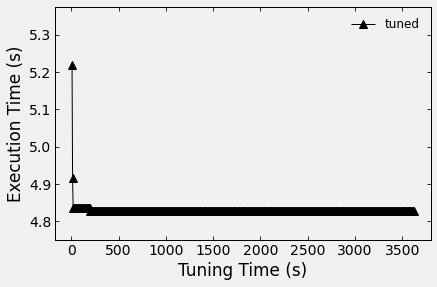

In [13]:
graph_tuning("hpl8.log")

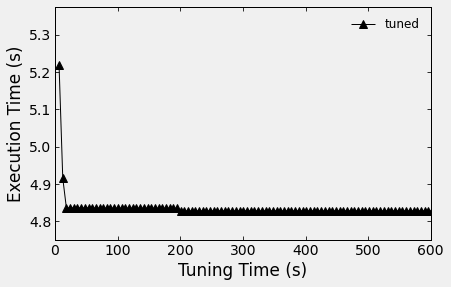

In [14]:
# only HPL parameters
graph_tuning("hpl8.log", last=600)

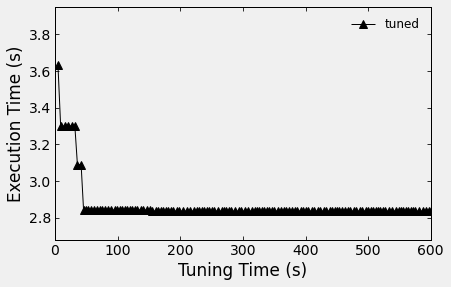

In [15]:
# HPL parameters + node/slot mapping
graph_tuning("hpl8_600s.log", last=600)

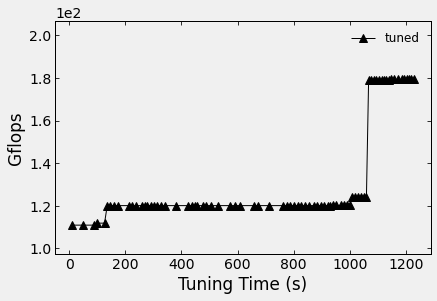

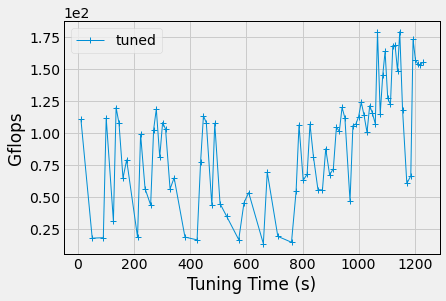

In [16]:
# HPL parameters + node/slot mapping + mpiv, n = 10000
graph_tuning_1("hpl_1200s_1.log")
graph_log_gflops("hpl_1200s_1.log")

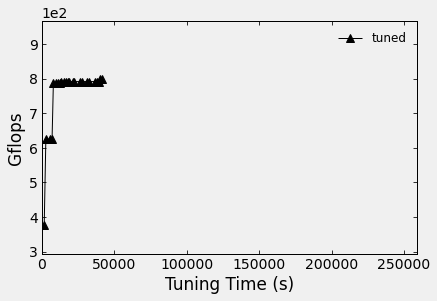

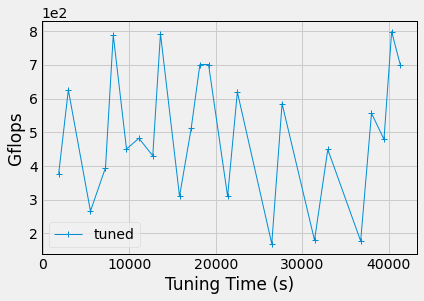

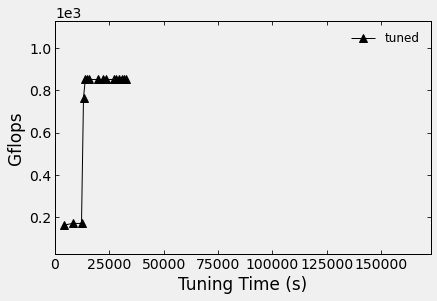

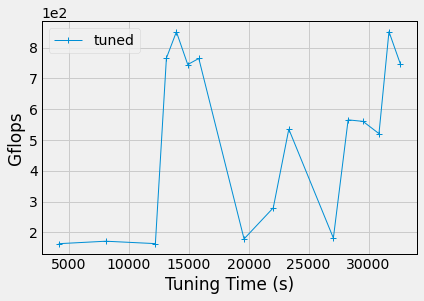

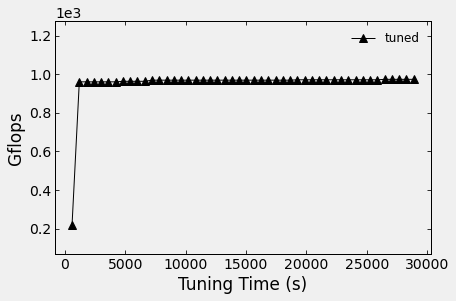

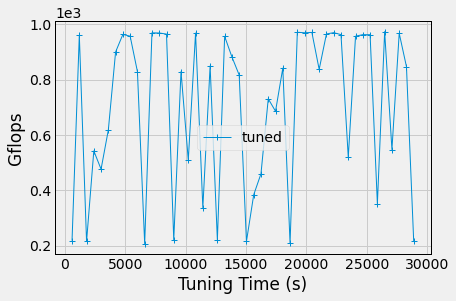

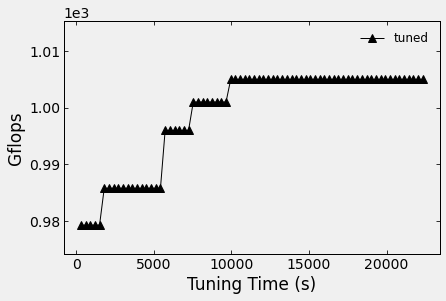

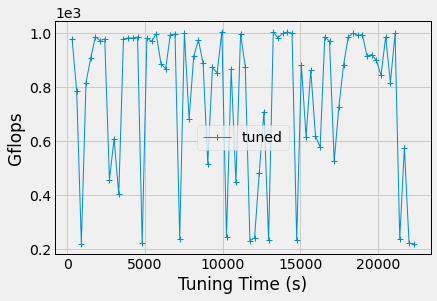

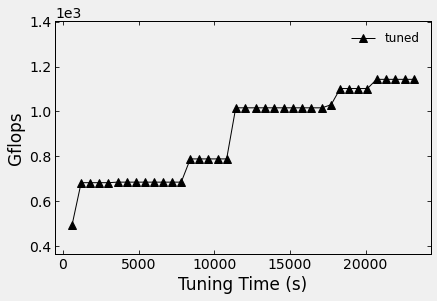

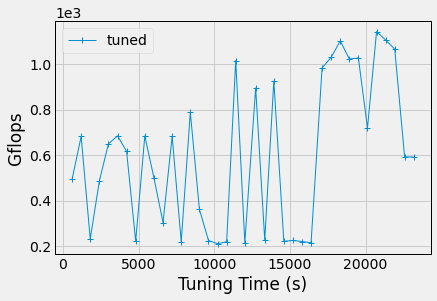

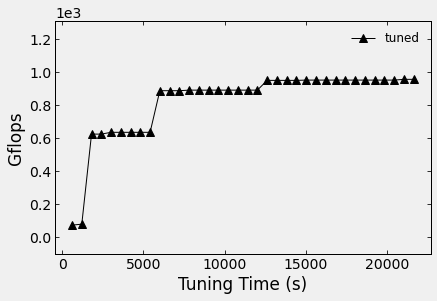

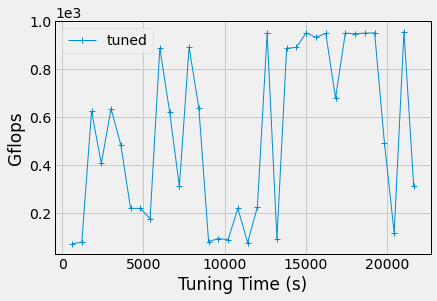

In [17]:
# n = 100000
graph_tuning_1("hpl_3days_1.log", last=259200)
graph_log_gflops("hpl_3days_1.log")
graph_tuning_1("hpl_2days_1.log", last=172800)
graph_log_gflops("hpl_2days_1.log")
graph_tuning_1("hpl_8h_1.log")
graph_log_gflops("hpl_8h_1.log")
graph_tuning_1("hpl_6h_1.log")
graph_log_gflops("hpl_6h_1.log")
graph_tuning_1("hpl_c_6h_1.log")
graph_log_gflops("hpl_c_6h_1.log")
graph_tuning_1("hpl21600_1.log")
graph_log_gflops("hpl21600_1.log")

# HPCG

<ipython-input-4-5259189ad363>:43: UserWarning: Attempting to set identical bottom == top == 22.3182 results in singular transformations; automatically expanding.
  plt.ylim(top=max_gflops+(max_gflops-min_gflops)*0.4, bottom=min_gflops-(max_gflops-min_gflops)*0.2)


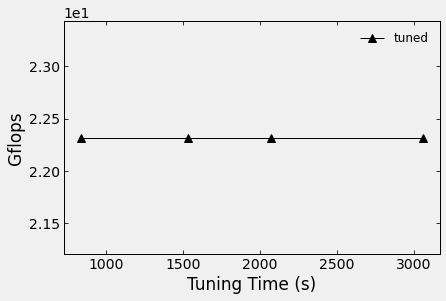

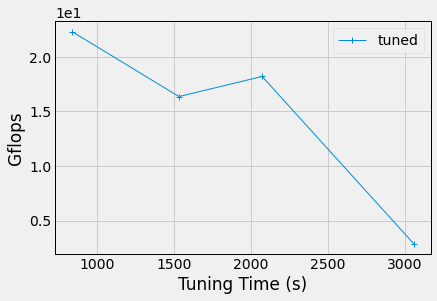

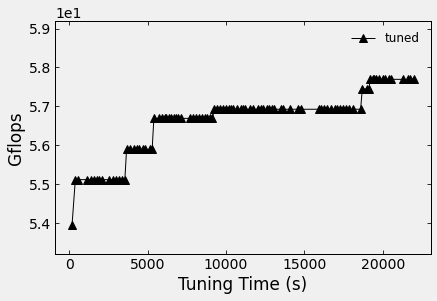

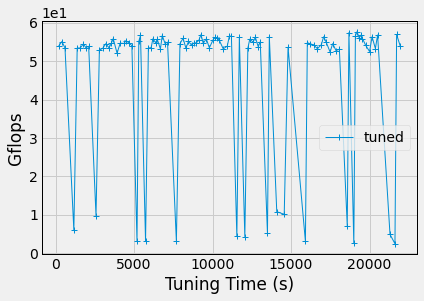

In [18]:
# HPCG 4 nodes
graph_tuning_1("hpcg_3600s_1.log")
graph_log_gflops("hpcg_3600s_1.log")
graph_tuning_1("hpcg_6h_1.log")
graph_log_gflops("hpcg_6h_1.log")